<a href="https://colab.research.google.com/github/Yash-Jumde/Colab-Notebooks/blob/main/Convolutional_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime

In [ ]:
print(f"Notebook last run : {datetime.datetime.now()}")

Notebook last run : 2024-04-16 09:49:21.085663


DATA

In [ ]:
import zipfile

In [ ]:
# Downloading the data.zip files
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Now unzip the downloaded zip file
zip_ref = zipfile.ZipFile('pizza_steak.zip', "r")
zip_ref.extractall()
zip_ref.close()

--2024-04-16 09:49:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.4MB/s    in 5.6s    

2024-04-16 09:49:27 (18.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



Inspecting The Data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

The Directory structure therefore is:

```
pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
 ```

In [ ]:
# To see how many images we are working with.

In [ ]:
import os

In [ ]:
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# Another way

num_of_steak_images_for_training = len(os.listdir('pizza_steak/train/steak'))

num_of_steak_images_for_training

750

In [ ]:
# For a bigger problem with more classes we can get the class names by doing the following.

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's view an image.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


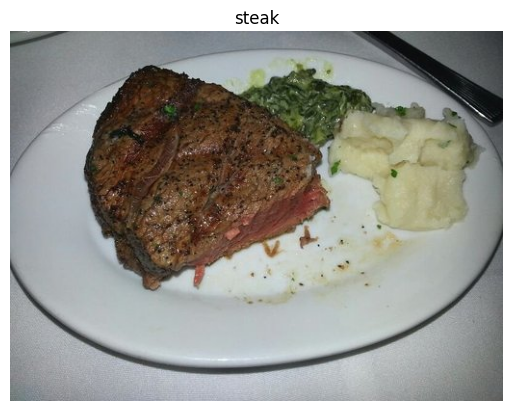

In [ ]:
img = view_random_image(target_dir = 'pizza_steak/train/',
                        target_class = 'steak')

array([[[ 85,  91,  87],
        [ 87,  93,  89],
        [ 90,  96,  92],
        ...,
        [ 47,  51,  54],
        [ 46,  50,  53],
        [ 44,  48,  51]],

       [[ 88,  94,  90],
        [ 91,  97,  93],
        [ 94, 100,  96],
        ...,
        [ 51,  55,  58],
        [ 49,  53,  56],
        [ 48,  52,  55]],

       [[ 94, 103,  98],
        [ 97, 106, 101],
        [100, 109, 104],
        ...,
        [ 51,  55,  58],
        [ 49,  53,  56],
        [ 48,  52,  55]],

       ...,

       [[108, 117, 116],
        [113, 122, 121],
        [111, 120, 119],
        ...,
        [ 91,  91,  89],
        [ 91,  91,  89],
        [ 92,  92,  90]],

       [[113, 122, 121],
        [117, 126, 125],
        [112, 121, 120],
        ...,
        [ 92,  92,  90],
        [ 91,  91,  89],
        [ 90,  90,  88]],

       [[110, 119, 118],
        [106, 115, 114],
        [113, 122, 121],
        ...,
        [ 95,  95,  93],
        [ 93,  93,  91],
        [ 90,  90,  88]]], dtype=uint8)
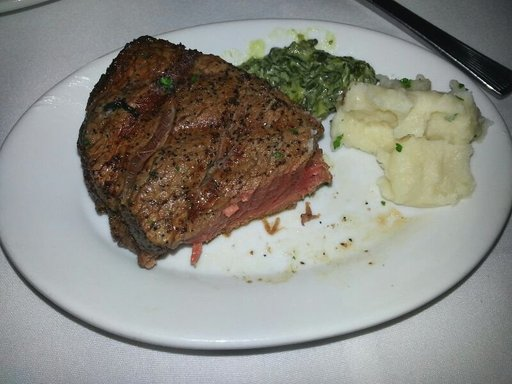

In [ ]:
img

In [ ]:
img/255.

array([[[0.33333333, 0.35686275, 0.34117647],
        [0.34117647, 0.36470588, 0.34901961],
        [0.35294118, 0.37647059, 0.36078431],
        ...,
        [0.18431373, 0.2       , 0.21176471],
        [0.18039216, 0.19607843, 0.20784314],
        [0.17254902, 0.18823529, 0.2       ]],

       [[0.34509804, 0.36862745, 0.35294118],
        [0.35686275, 0.38039216, 0.36470588],
        [0.36862745, 0.39215686, 0.37647059],
        ...,
        [0.2       , 0.21568627, 0.22745098],
        [0.19215686, 0.20784314, 0.21960784],
        [0.18823529, 0.20392157, 0.21568627]],

       [[0.36862745, 0.40392157, 0.38431373],
        [0.38039216, 0.41568627, 0.39607843],
        [0.39215686, 0.42745098, 0.40784314],
        ...,
        [0.2       , 0.21568627, 0.22745098],
        [0.19215686, 0.20784314, 0.21960784],
        [0.18823529, 0.20392157, 0.21568627]],

       ...,

       [[0.42352941, 0.45882353, 0.45490196],
        [0.44313725, 0.47843137, 0.4745098 ],
        [0.43529412, 0

In [ ]:
# Typical architecture of a convolutional neural network.

Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |


The model we're using uses here replicates TinyVGG, the computer vision architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(10)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=10)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=10)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the data
history = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 31s 355ms/step - loss: 0.5618 - accuracy: 0.7153 - val_loss: 0.4376 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 12s 260ms/step - loss: 0.4720 - accuracy: 0.7847 - val_loss: 0.3846 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4338 - accuracy: 0.8193 - val_loss: 0.3872 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3801 - accuracy: 0.8500 - val_loss: 0.3767 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 7s 143ms/step - loss: 0.3905 - accuracy: 0.8393 - val_loss: 0.3915 - val_accuracy: 0.8280


In [ ]:
# The baseline score for the Food 101 problem is 50.76 % accuracy.
# Here our model_1 beats that but this due to the fact that we are only performing a binary classification.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
# Let's try a binary classification model we have already tried.

In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [ ]:
# Model_2

tf.random.set_seed(10)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 126ms/step - loss: 0.6988 - accuracy: 0.5080 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.4707 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 117ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# This model actually performs worse than the model_1

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Let's try to increase the number of hidden neurons.

tf.random.set_seed(10)

# Model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 119ms/step - loss: 2.6663 - accuracy: 0.6193 - val_loss: 0.8475 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 1.3366 - accuracy: 0.6653 - val_loss: 0.8164 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 1.4032 - accuracy: 0.6673 - val_loss: 0.5581 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.5557 - accuracy: 0.7653 - val_loss: 0.7686 - val_accuracy: 0.6580
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.6348 - accuracy: 0.7347 - val_loss: 0.4535 - val_accuracy: 0.7860


In [ ]:
# This model actually performs worse ==> increasing the number of parameters doesn't ensure better results.

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Let's take a smaller version of the model that can be found on the CNN explainer website and build a 3 layer convolutional neural network.

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


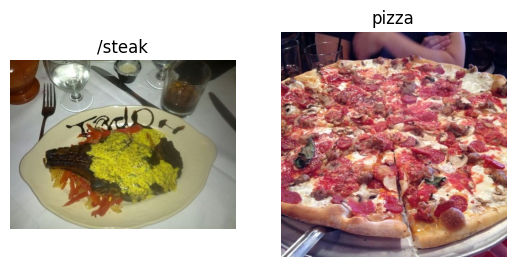

In [ ]:
# Visualize the data.
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', '/steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

In [ ]:
# define trai and test directory paths.

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn the data into batches.

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of training data batch.
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# A typical CNN structure.

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Checking the lengths of train and test data generators.
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 172ms/step - loss: 1.3589 - accuracy: 0.6967 - val_loss: 0.3985 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 8s 159ms/step - loss: 0.3562 - accuracy: 0.8547 - val_loss: 0.3445 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.2165 - accuracy: 0.9333 - val_loss: 0.3512 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.1013 - accuracy: 0.9707 - val_loss: 0.3170 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.0308 - accuracy: 0.9987 - val_loss: 0.3636 - val_accuracy: 0.8580


In [ ]:
# let's plot the training curves.

<Axes: >

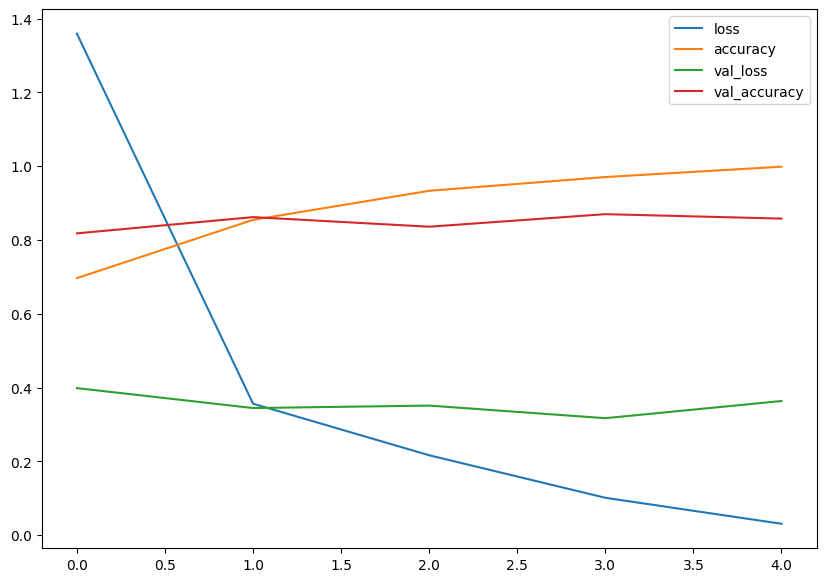

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# Let's seperate the validation and training data curves.

def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plotting losses
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plotting accuracy.
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accucracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()


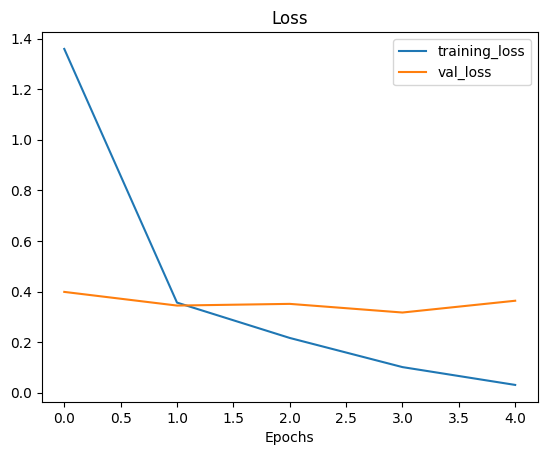

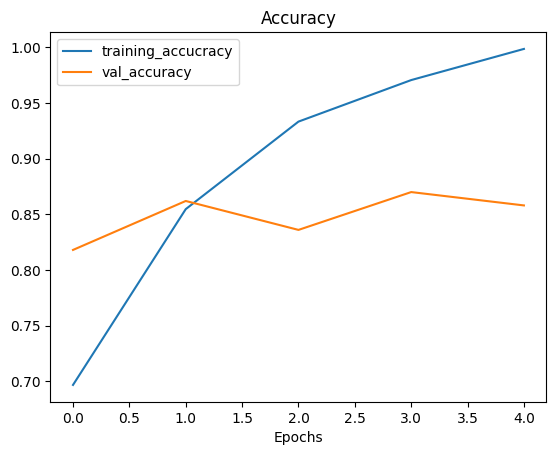

In [ ]:
plot_loss_curves(history_4)

In [ ]:
# in an ideal scenario, the validation curve should slightly under the training curve.

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The above curves indicate that the model is overfitting the training data. Let's try and reduce the overfitting.

1. Now we are trying a modified basic CNN structure.
```
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```

In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2), # reduce number of features by half
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 242ms/step - loss: 0.6056 - accuracy: 0.6813 - val_loss: 0.4943 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 8s 168ms/step - loss: 0.4762 - accuracy: 0.7893 - val_loss: 0.4292 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4440 - accuracy: 0.8133 - val_loss: 0.3930 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4300 - accuracy: 0.8073 - val_loss: 0.3873 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 13s 281ms/step - loss: 0.4220 - accuracy: 0.8120 - val_loss: 0.4159 - val_accuracy: 0.8120


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [ ]:
# With the use of MaxPool2D layer the total number of params have drastically reduced.

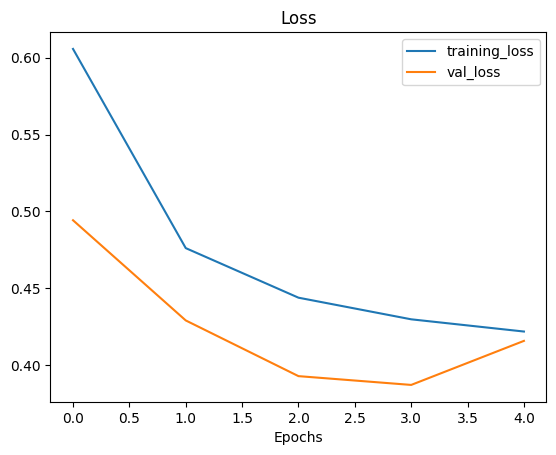

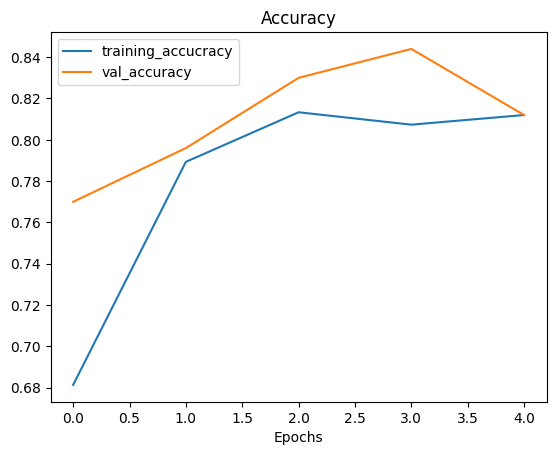

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# Let's try to attempt data augmentation to further reduce overfitting.

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, #rotates the image between 0 to 20 degrees.
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. It is only performed on the training data, where it is randomly manipulated when loaded into the model.

In [ ]:
print("Augmented Training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)
# Shuffle should be kept True for randomness.

print("Non-augmented training images.")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images.")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented Training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images.
Found 1500 images belonging to 2 classes.
Unchanged test images.
Found 500 images belonging to 2 classes.


In [ ]:
# Let's see the augmented images.
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

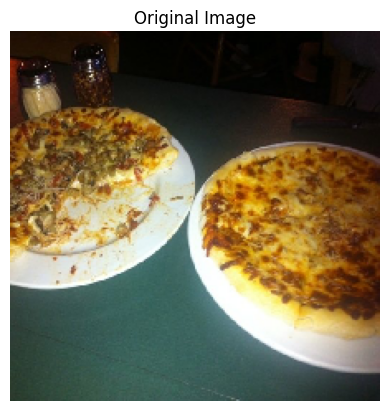

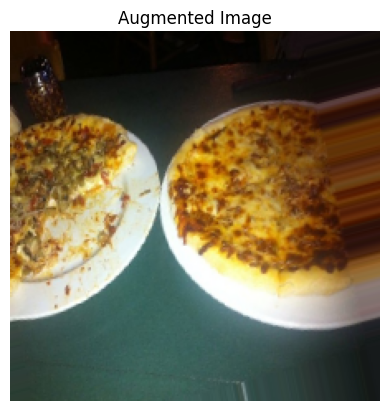

In [ ]:
random_no = random.randint(0, 31)
plt.imshow(images[random_no])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_no])
plt.title("Augmented Image")
plt.axis(False)


In [ ]:
# Let's try model_5 on this augmented data to see how useful data augmentation can be.

In [ ]:
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 590ms/step - loss: 0.7611 - accuracy: 0.4247 - val_loss: 0.6918 - val_accuracy: 0.5940
Epoch 2/5
47/47 [==============================] - 31s 665ms/step - loss: 0.6946 - accuracy: 0.4627 - val_loss: 0.6913 - val_accuracy: 0.5280
Epoch 3/5
47/47 [==============================] - 23s 477ms/step - loss: 0.6929 - accuracy: 0.5520 - val_loss: 0.6872 - val_accuracy: 0.5280
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6895 - accuracy: 0.5513 - val_loss: 0.6621 - val_accuracy: 0.7300
Epoch 5/5
47/47 [==============================] - 23s 483ms/step - loss: 0.6888 - accuracy: 0.5753 - val_loss: 0.6597 - val_accuracy: 0.5520


In [ ]:
# The model doesn't perform good because we turned off 'Shuffle'.

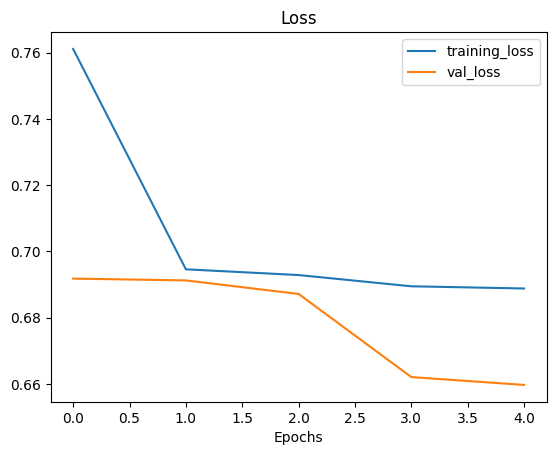

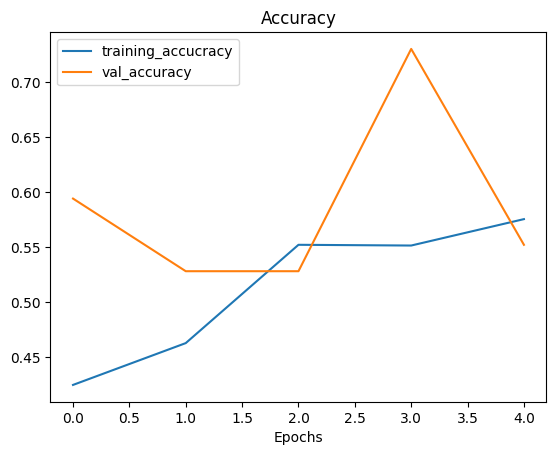

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 462ms/step - loss: 0.6278 - accuracy: 0.6600 - val_loss: 0.5678 - val_accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 20s 434ms/step - loss: 0.5210 - accuracy: 0.7440 - val_loss: 0.4310 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5020 - accuracy: 0.7647 - val_loss: 0.3955 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 22s 459ms/step - loss: 0.5012 - accuracy: 0.7580 - val_loss: 0.3820 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 22s 461ms/step - loss: 0.4623 - accuracy: 0.7993 - val_loss: 0.4784 - val_accuracy: 0.7640


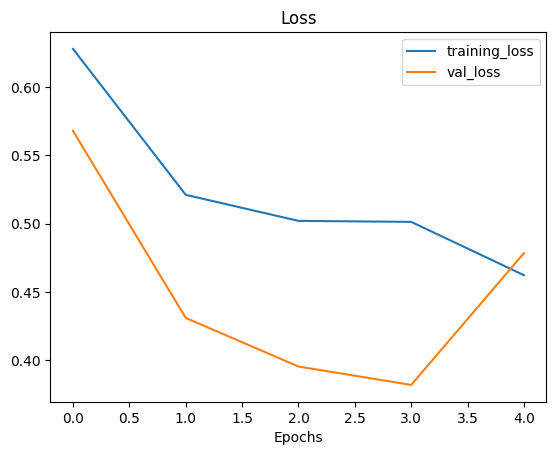

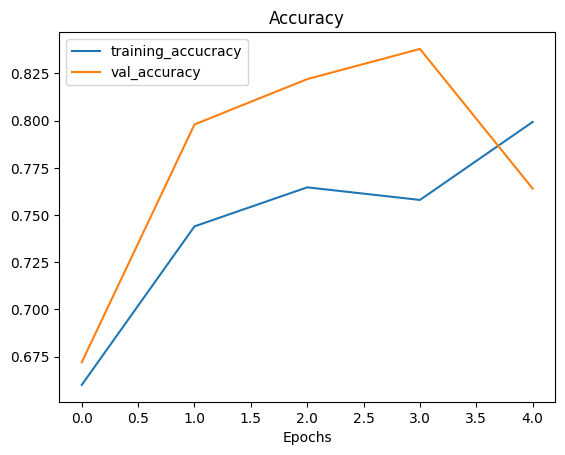

In [ ]:
plot_loss_curves(history_7)

In [ ]:
# Hyperparameter Tuning.

In [ ]:
# Let's go back to model_1 --> Tiny VGG
model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 458ms/step - loss: 0.6460 - accuracy: 0.6160 - val_loss: 0.5276 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 21s 444ms/step - loss: 0.5425 - accuracy: 0.7407 - val_loss: 0.4361 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5048 - accuracy: 0.7667 - val_loss: 0.3707 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4849 - accuracy: 0.7773 - val_loss: 0.4002 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 21s 447ms/step - loss: 0.4909 - accuracy: 0.7767 - val_loss: 0.4469 - val_accuracy: 0.7880


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

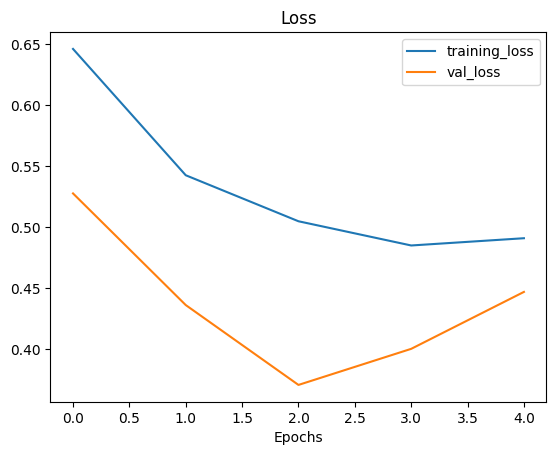

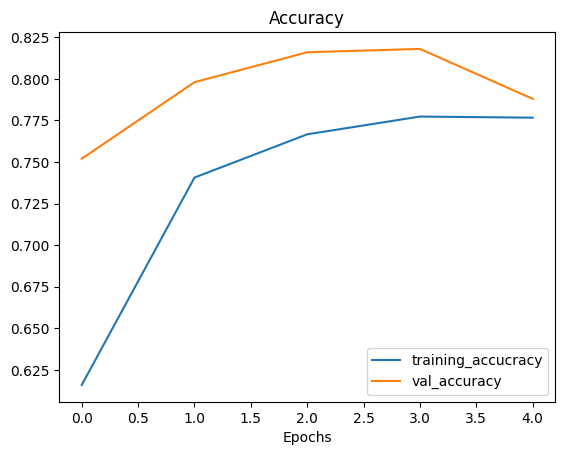

In [ ]:
plot_loss_curves(history_8)

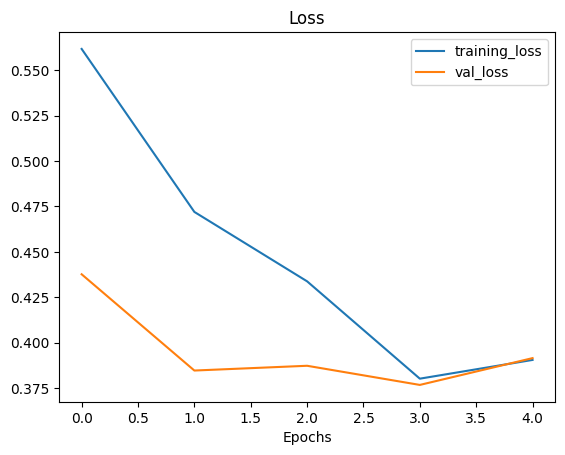

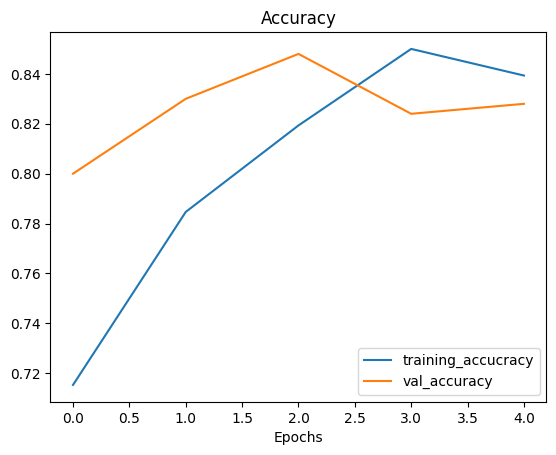

In [ ]:
plot_loss_curves(history)

The model might perform better if we trained it for a little longer, i.e., increase the number of epochs

In [ ]:
print(class_names)

['pizza' 'steak']


--2024-04-16 10:02:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.007s  

2024-04-16 10:02:13 (257 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

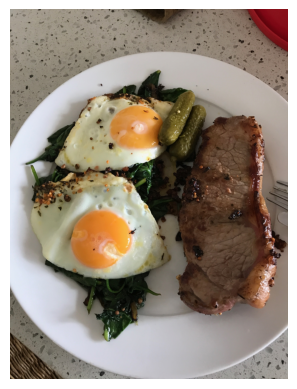

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
# As input shape = 224, 224, 3 we need to reshpae this 'steak' image.

In [ ]:
def load_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor with 3 colour channels.
  img = tf.image.decode_image(img, channels=3)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale
  img = img/255.
  return img

In [ ]:
steak = load_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# model_8.predict(steak)

In [ ]:
# As we have trained the model in batches of 32, this becomes the first dimension
# Thus the shape of the image becomes (x, x, x, x).

In [ ]:
# Add an extra dimension
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # Adding an extra axis at '0' to get (1, 224, 224, 3)
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 273ms/step


array([[0.93010813]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  # Load and prep image
  img = load_image(filename)
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  # Get prediction class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the results.
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 31ms/step


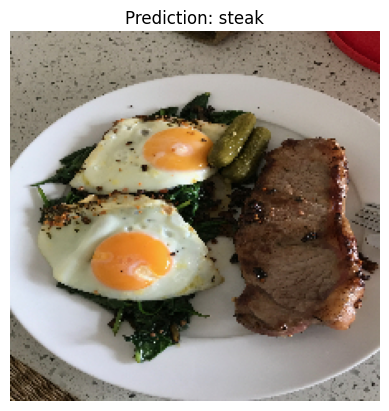

In [ ]:
pred_and_plot(model_8, '03-steak.jpeg', class_names)

--2024-04-16 10:09:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2024-04-16 10:09:58 (223 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 31ms/step


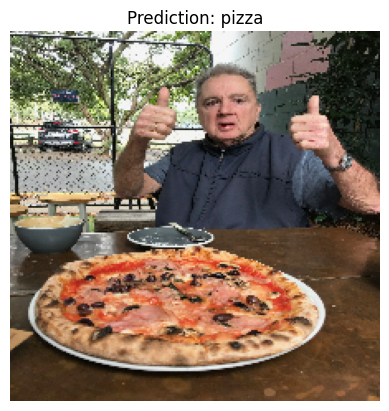

In [ ]:
# Let's try some other image.
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, '03-pizza-dad.jpeg', class_names)